Feature ranking:
1. feature 1230 (0.051675)
2. feature 1286 (0.027726)
3. feature 1279 (0.026727)
4. feature 1247 (0.026702)
5. feature 1304 (0.025941)
6. feature 1295 (0.025820)
7. feature 837 (0.025719)
8. feature 1293 (0.025628)
9. feature 1239 (0.025409)
10. feature 1307 (0.025394)


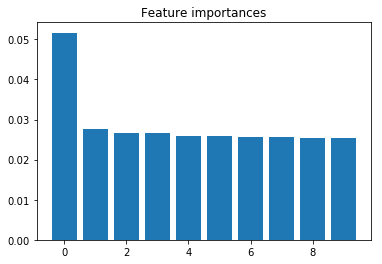

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

data = pd.read_csv("./LargeTrain.csv")

X = np.array(data.ix[:,0:1804])
y = np.array(data.ix[:,1804:1805]).ravel()

forest = RandomForestClassifier(n_estimators=10)

forest = forest.fit(X, y)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")

plt.bar(range(10), importances[indices[0:10]]) #show top 10 more influential features
plt.show()

In [3]:
from sklearn.metrics import confusion_matrix
X_new = X[:,indices[0:10]]
forest_new = RandomForestClassifier(n_estimators=10)
forest_new = forest_new.fit(X_new, y)

y_pred = forest_new.predict(X_new)
cnf_matrix = confusion_matrix(y, y_pred)

print cnf_matrix

[[1539    0    0    0    0    1    0    0    1]
 [   1 2476    0    0    0    0    0    1    0]
 [   0    0 2942    0    0    0    0    0    0]
 [   2    0    0  472    0    0    0    1    0]
 [   0    0    0    0   42    0    0    0    0]
 [   4    1    1    6    0  739    0    0    0]
 [   0    0    0    0    0    0  398    0    0]
 [   5    0    1    0    0    1    0 1221    0]
 [   2    1    1    1    0    2    0    0 1006]]
